## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [20]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [21]:
path = '/Volumes/AirStorage/~Python'

In [28]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'PctPovert.csv'),encoding = 'unicode_escape', on_bad_lines='skip', sep = ";")

##df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','PctPov.csv'),encoding = 'unicode_escape', on_bad_lines='skip', sep = ";")

##  /Volumes/AirStorage/~Python/02 Data/Prepared Data/PvtyCen 95-20 Update Mod.csv

### 2. Data cleaning

In [29]:
df.columns

Index(['ï»¿Year', 'State', 'Percent in poverty'], dtype='object')

In [30]:
df.head(20)

,ï»¿Year,State,Percent in poverty
0,2021,Alabama,16
1,2021,Alaska,11
2,2021,Arizona,13
3,2021,Arkansas,17
4,2021,California,12
5,2021,Colorado,8
6,2021,Connecticut,8
7,2021,Delaware,12
8,2021,District of Columbia,14
9,2021,Florida,13


In [31]:
df.shape

(1377, 3)

In [32]:
# Rename the columns in the same way as in Exercise 6.2.
# Drop columns not needed (Margin of Error)

df.rename(columns = {'ï»¿Year' : 'Year', }, inplace = True)

In [33]:
df_sub1 = df[df['Year']== 2010][['State','Percent in poverty','Year']]

In [34]:
df_sub1.head()

,State,Percent in poverty,Year
561,Alabama,17,2010
562,Alaska,13,2010
563,Arizona,19,2010
564,Arkansas,15,2010
565,California,16,2010


## So far, so good.

##### Missing values

In [35]:
# Check for missing values

df_sub1.isnull().sum()

# No missing values to handle

State                 0
Percent in poverty    0
Year                  0
dtype: int64

##### Duplicates check

In [36]:
dups = df_sub1.duplicated()

In [37]:
dups.shape # No dups
print (df_sub1.dtypes) # type of data

State                 object
Percent in poverty     int64
Year                   int64
dtype: object


##### Extreme values checks

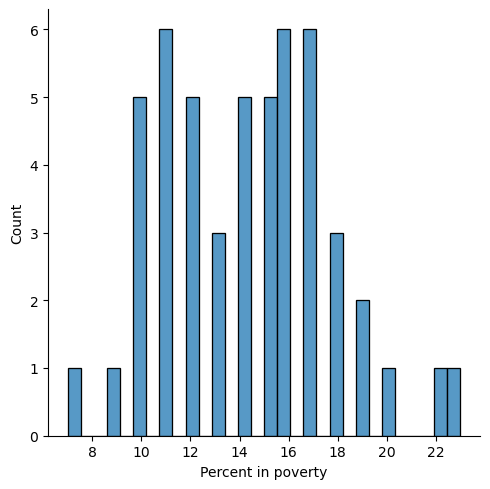

In [38]:
sns.displot(df_sub1['Percent in poverty'], bins=30) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [39]:
df['Percent in poverty'].mean() # Check the mean

12.485838779956428

In [40]:
df['Percent in poverty'].median() # Check the median

12.0

In [41]:
df['Percent in poverty'].max() # Check the max

26

### 3. Data prep for regression analysis 

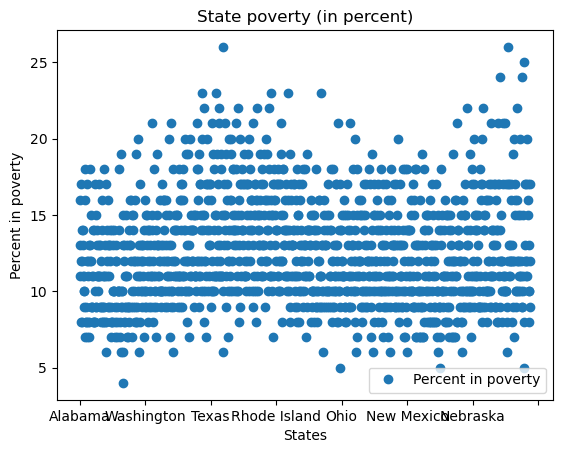

In [42]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'State', y='Percent in poverty',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('State poverty (in percent)')  
plt.xlabel('States')  
plt.ylabel('Percent in poverty')  
plt.show()

In [50]:
## Using LabelEncoder I need to give the States numbers. I have been running int an issue/error as follows:
## ValueError: could not convert string to float: 'New_Hampshire'
## Using LabelEncoder should fix this.

label_encoder = LabelEncoder()
df_sub1['State_encoded'] = label_encoder.fit_transform(df_sub1['State'])
print(df_sub1.head())

          State  Percent in poverty  Year  State_encoded
561     Alabama                  17  2010              0
562      Alaska                  13  2010              1
563     Arizona                  19  2010              2
564    Arkansas                  15  2010              3
565  California                  16  2010              4


In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sub1['State_encoded'].values.reshape(-1,1)
y = df_sub1['Percent in poverty'].values.reshape(-1,1)

In [53]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50]])

In [54]:
y

array([[17],
       [13],
       [19],
       [15],
       [16],
       [12],
       [ 9],
       [12],
       [20],
       [16],
       [19],
       [12],
       [14],
       [14],
       [16],
       [10],
       [15],
       [18],
       [22],
       [13],
       [11],
       [11],
       [16],
       [11],
       [23],
       [15],
       [15],
       [10],
       [17],
       [ 7],
       [11],
       [18],
       [16],
       [17],
       [13],
       [15],
       [16],
       [14],
       [12],
       [14],
       [17],
       [14],
       [17],
       [18],
       [10],
       [11],
       [11],
       [12],
       [17],
       [10],
       [10]])

In [55]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

# 

In [56]:
# Create a regression object.

regression = LinearRegression()  
# This is the regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

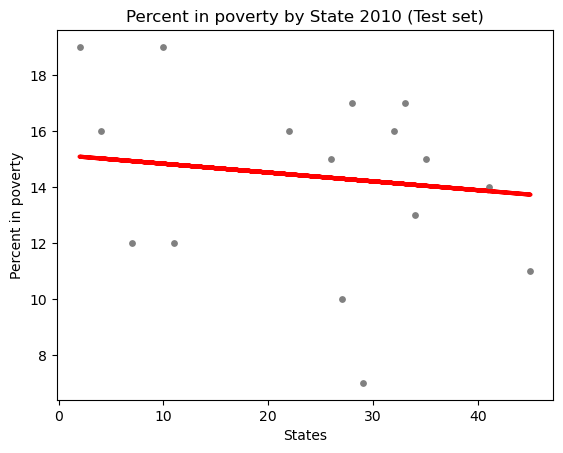

In [71]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Percent in poverty by State 2010 (Test set)')
plot_test.xlabel('States')
plot_test.ylabel('Percent in poverty')
plot_test.show()
## Using Label_encoder, I have giv3en the states numbers instead of names.
## I was encountering an error with 'New Hampshite' not being able to be correctly parsed.
## This way we can still analyze the data, although further work will be needed to place the names back corrrespondingly.

In [72]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [73]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03150928]]
Mean squared error:  9.533635143946496
R2 score:  0.06668810827904281


In [74]:
y_predicted

array([[14.22942373],
       [14.79659078],
       [14.82810006],
       [14.4499887 ],
       [15.0801743 ],
       [14.26093301],
       [13.72527525],
       [14.13489589],
       [14.32395157],
       [15.01715574],
       [14.10338661],
       [13.85131237],
       [14.29244229],
       [14.04036805],
       [14.07187733],
       [14.9226279 ]])

In [75]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7,14.229424
1,12,14.796591
2,19,14.828100
3,16,14.449989
4,19,15.080174
5,17,14.260933
6,11,13.725275
7,16,14.134896
8,15,14.323952
9,16,15.017156


##### Compare how the regression fits the training set

In [76]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [77]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03150928]]
Mean squared error:  11.87443072764092
R2 score:  0.019535074052296708


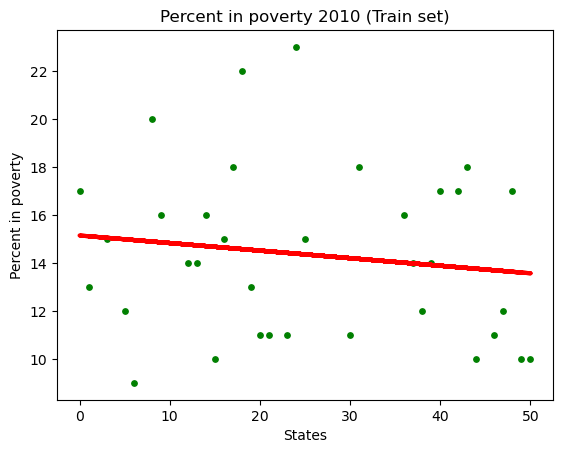

In [79]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Percent in poverty 2010 (Train set)')
plot_test.xlabel('States')
plot_test.ylabel('Percent in poverty')
plot_test.show()